# Experiment -
Name: Shantanu Shaji

PRN: 24070126165

---
Title: Implementation of Support Vector Machines

Aim: To apply SVMs on the given dataset

---

## Theory

**Support Vector Machines:**
They provide an assistance to the hard margin used during classification.

**Hard Margin:**
The line beyond which either class lies definitely.

They provide **extra soft margins**, which allow better separation of data points from the hard margin.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.datasets import make_circles, make_moons

R_STATE=1

In [16]:
X_lin, y_lin = make_blobs(
    n_samples = 500,
    centers=2,
    random_state=R_STATE)

display(X_lin[:5],y_lin[:5])

y_lin = np.where(y_lin == 1, 1, -1)
display(y_lin[:5])

array([[-10.14090825,  -2.92036477],
       [ -2.51101556,   5.40737129],
       [-10.80389072,  -3.90428685],
       [  0.53113982,   2.51012895],
       [ -8.92872653,  -4.16310148]])

array([1, 0, 1, 0, 1])

array([ 1, -1,  1, -1,  1])

In [22]:
X_c, y_c = make_circles(n_samples = 500,
                        noise = 0.04,
                        factor=0.45,
                        random_state=R_STATE
                        )

X_m,y_m = make_moons(n_samples = 500,
                        noise = 0.08,
                        random_state=R_STATE
                        )

y_c = np.where(y_c == 1, 1, -1)
y_m = np.where(y_m == 1, 1, -1)

display(y_c[:5],y_m[:5])

array([ 1,  1, -1, -1,  1])

array([ 1,  1, -1, -1,  1])

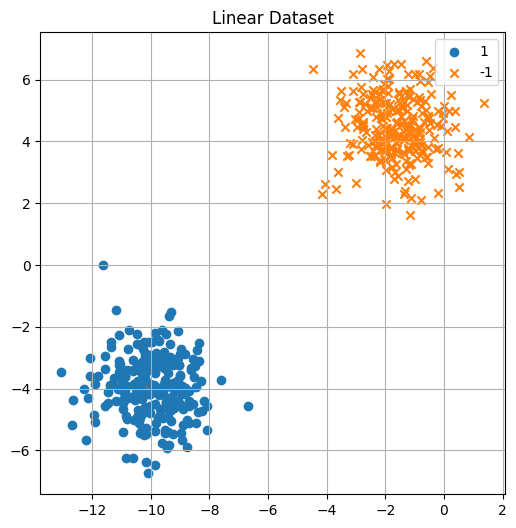

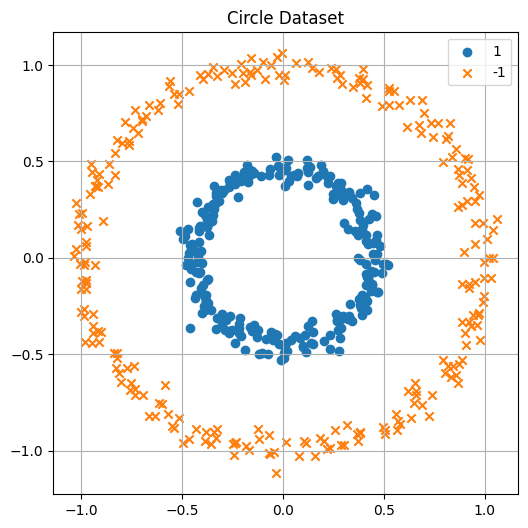

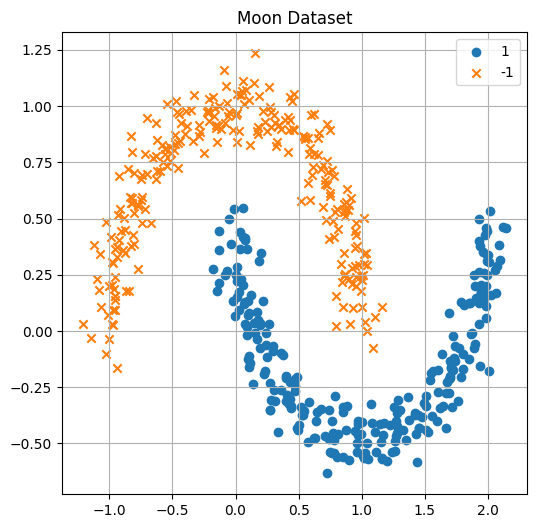

In [26]:
def plot_data(X,y, title="Dataset"):
  plt.figure(figsize=(6,6))
  plt.scatter(X[y==1,0], X[y==1,1], marker='o', label=1)
  plt.scatter(X[y==-1,0], X[y==-1,1], marker='x', label=-1)
  plt.title(title)
  plt.grid(True)
  plt.legend()
  plt.show()

plot_data(X_lin, y_lin, "Linear Dataset")
plot_data(X_c, y_c, "Circle Dataset")
plot_data(X_m, y_m, "Moon Dataset")

In [46]:
def plot_dec_bound(model, X, y, title="Decision Boundaries"):
  x_min, x_max = X[:,0].min()-0.4, X[:,0].max()+0.4
  y_min, y_max = X[:,1].min()-0.4, X[:,1].max()+0.4

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 350),
                       np.linspace(y_min, y_max, 350))

  grid = np.c_[xx.ravel(), yy.ravel()]
  z = model.decision_function(grid).reshape(xx.shape)

  plt.figure(figsize=(6,6))
  plt.contourf(xx, yy, z, levels=[-1,0,1], linestyles=['--','-','--'], colors=['blue','black','purple'], alpha=0.2)
  plt.scatter(X[y==1,0], X[y==1,1], marker='o', label=1)
  plt.scatter(X[y==-1,0], X[y==-1,1], marker='x', label=-1)

  sv = model.support_vectors_
  plt.scatter(sv[:,0], sv[:,1], s=120, facecolors='none', edgecolors='k', linewidths=1.5, label='SV')
  plt.title(title)
  plt.grid(True)
  plt.legend()
  plt.show

Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



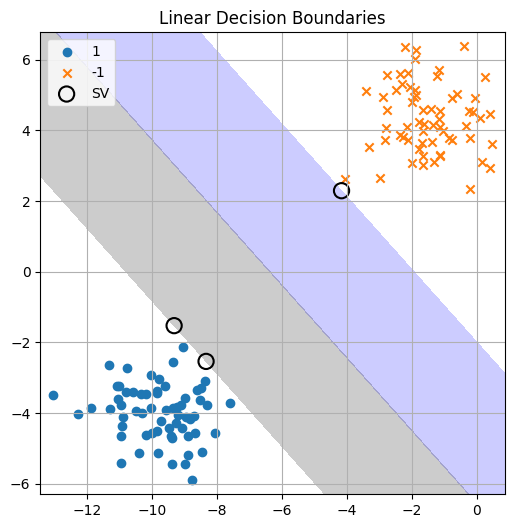

In [47]:
X_tr_l, X_te_l, y_tr_l, y_te_l = train_test_split(X_lin, y_lin, test_size=0.25, stratify=y_lin)
model_lin = SVC(kernel='linear', C=1)
model_lin.fit(X_tr_l, y_tr_l)

y_p_l = model_lin.predict(X_te_l)
print("Report:\n", classification_report(y_te_l, y_p_l))
plot_dec_bound(model_lin, X_te_l, y_te_l, "Linear Decision Boundaries")


Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



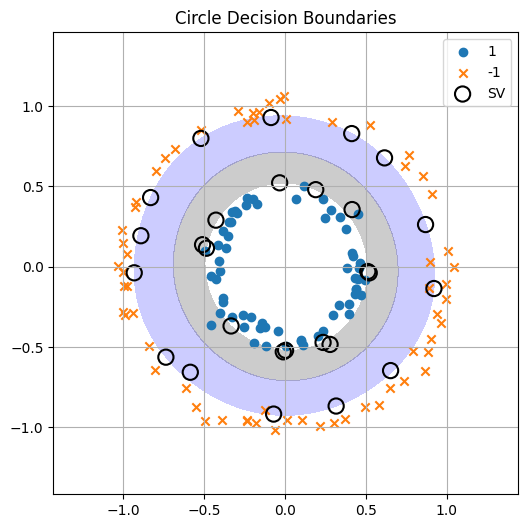

In [72]:
X_tr_c, X_te_c, y_tr_c, y_te_c = train_test_split(X_c, y_c, test_size=0.25, stratify=y_c)
model_c = SVC(kernel='rbf', C=1)
model_c.fit(X_tr_c, y_tr_c)

y_p_c = model_c.predict(X_te_c)
print("Report:\n", classification_report(y_te_c, y_p_c))
plot_dec_bound(model_c, X_te_c, y_te_c, "Circle Decision Boundaries")

Report:
               precision    recall  f1-score   support

          -1       0.97      1.00      0.98        62
           1       1.00      0.97      0.98        63

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



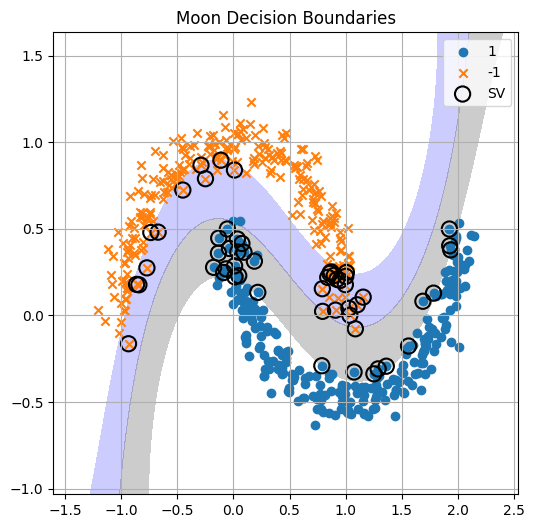

In [70]:
X_tr_m, X_te_m, y_tr_m, y_te_m = train_test_split(X_m, y_m, test_size=0.25, stratify=y_m)
model_m = SVC(kernel='rbf', C=4, gamma=0.3)
model_m.fit(X_tr_m, y_tr_m)

y_p_m = model_m.predict(X_te_m)
print("Report:\n", classification_report(y_te_m, y_p_m))
plot_dec_bound(model_m, X_m, y_m, "Moon Decision Boundaries")

Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



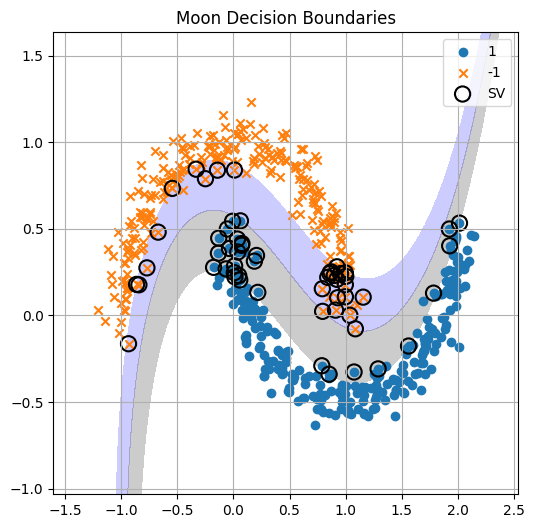

In [71]:
X_tr_m, X_te_m, y_tr_m, y_te_m = train_test_split(X_m, y_m, test_size=0.25, stratify=y_m)
model_m = SVC(kernel='poly', coef0=1, C=4, gamma=0.3)
model_m.fit(X_tr_m, y_tr_m)

y_p_m = model_m.predict(X_te_m)
print("Report:\n", classification_report(y_te_m, y_p_m))
plot_dec_bound(model_m, X_m, y_m, "Moon Decision Boundaries")

Report:
               precision    recall  f1-score   support

          -1       0.69      0.38      0.49        63
           1       0.57      0.82      0.67        62

    accuracy                           0.60       125
   macro avg       0.63      0.60      0.58       125
weighted avg       0.63      0.60      0.58       125



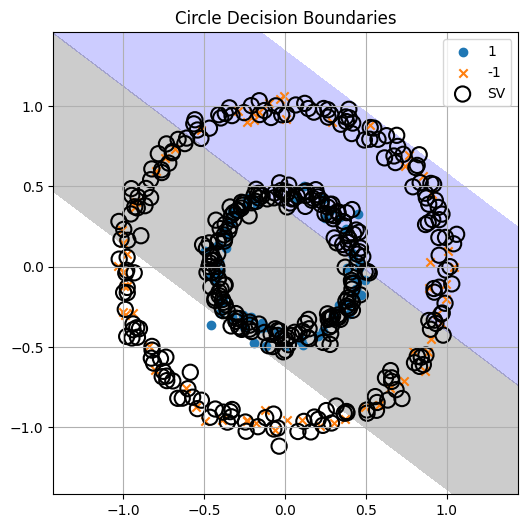

In [75]:
model_lin.fit(X_tr_c, y_tr_c)
y_p_c_l = model_lin.predict(X_te_c)
print("Report:\n", classification_report(y_te_c, y_p_c_l))
plot_dec_bound(model_lin, X_te_c, y_te_c, "Circle Decision Boundaries")